<a href="https://colab.research.google.com/github/duttagoutam/LJMUMasters/blob/master/ImageCaptioningVideoKeyFrameExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [0]:
import cv2
import matplotlib.pyplot as plt
import nltk
import tensorflow as tf
import keras
import string
import sys, time, os, warnings 
import numpy as np
import pandas as pd
import pydotplus
from pandas import DataFrame
from array import array
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import Embedding
from keras.layers.merge import concatenate
from keras.layers.merge import add
from keras.layers.pooling import GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from numpy import argmax
from pickle import dump
from pickle import load
from keras.utils.vis_utils import model_to_dot

# Extract Key Frames from Video

In [0]:
# Not To Run Always
folderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101/BabyCrawling'
outputFolderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-Images'

In [0]:
# Not To Run Always run on local, collab does not support cv2
# calculate sigma value
def norm_stddev(video_file):
    cap = cv2.VideoCapture(video_file)   
    std_dev = list()
    #print("cap.isOpened()",cap.isOpened())
    f=1
    while cap.isOpened():
        ret, curr_frame = cap.read()
        if ret:
            if f!=1:
                diff = cv2.absdiff(curr_frame, prev_frame)
                #print("diff:",diff)
                diff_norm = np.linalg.norm(diff)
                std_dev.append(diff_norm)
            prev_frame = curr_frame
            f=f+1
        else:
            break
        
    sigma = np.std(std_dev)
    #print("sigma:"+ str(sigma))
    
    cap.release()
    cv2.destroyAllWindows()
    return sigma

In [0]:
# Not To Run Always run on local, collab does not support cv2
# Extract key image file
def extract_key_images(file_name, video_file, output_dir, std_dev, n):
    
    cap = cv2.VideoCapture(video_file)
    key_images = list()
    #print("cap.isOpened()",cap.isOpened())
    f=1
    count=0
    while cap.isOpened():
        ret, curr_frame = cap.read()
        #print("ret:", ret)
        if ret:
            if f!=1:
                #print("Inside 2:", count)
                diff = cv2.absdiff(curr_frame, prev_frame)
                #print("diff:",diff)
                diff_norm = np.linalg.norm(diff)
                #print("diff_norm:",diff_norm)
                if diff_norm > (n * std_dev):  
                    #print("Inside If 2:", count)
                    #imageName = file_name+'_'+"image{}.jpg".format(f)
                    imageName = "image{}.jpg".format(count)
                    cv2.imwrite(output_dir+'/'+imageName,curr_frame)
                    key_images.append(imageName)
                    count = count+1
                    #print("Count:", count)
            if f == 1:
                #print("Inside 1:", count)
                #imageName = file_name+'_'+"image{}.jpg".format(f)
                #cv2.imwrite(output_dir+'/'+imageName,curr_frame)
                imageName = "image{}.jpg".format(count)
                cv2.imwrite(output_dir+'/'+imageName,curr_frame)
                key_images.append(imageName)
                count = count+1
                #print("Count:", count)
            prev_frame = curr_frame
            f =f+1
        else:
            break

    
    cap.release()
    cv2.destroyAllWindows()
    #print("key_images inside extract_key_images:",key_images)
    return key_images

In [0]:
# Not To Run Always run on local, collab does not support cv2
# Test Extract key image file from video file
fileName = 'v_BabyCrawling_g08_c02.avi'
filePath = folderName+'/'+ fileName
sigma_val = norm_stddev(filePath)
print("sigma:", sigma_val)
n=6
key_images = extract_key_images(fileName, filePath, outputFolderName, sigma_val, n)
print("key_images:", len(key_images))

sigma: 2095.2913920871497
key_images: 16


In [0]:
# Not To Run Always run on local, collab does not support cv2
# Test Extract key image file from video file
folderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/Code/KeyFrame'
outputFolderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/Code/KeyFrame'
fileName = 'vad.mp4'
filePath = folderName+'/'+ fileName
sigma_val = norm_stddev(filePath)
print("sigma:", sigma_val)
n=3
key_images = extract_key_images(fileName, filePath, outputFolderName, sigma_val, n)
print("key_images:", len(key_images))

sigma: 3658.102654802168
key_images: 15


In [0]:
# Not To Run Always run on local, collab does not support cv2
# Test Extract key image file from video file

folderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/TomAndJerry'
outputFolderName= 'E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/TomAndJerry/Images2'
fileName="Tom and Jerry.mp4"
fullPath = folderName+'/'+"Tom and Jerry.mp4"
sigma = norm_stddev(fullPath)
print("sigma1:", sigma)
n=3
key_images = extract_key_images(fileName, fullPath, outputFolderName, sigma, n)
print("key_images:", len(key_images))

sigma1: 27504.930892600016
key_images: 208


In [0]:
# Not To Run Always run on local, collab does not support cv2
# Extract key image file from video file
folderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101'
outputFolderName='E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-Images'
n=6
path = folderName
for subdir, dirs, files in os.walk(path):
    #print("dirs:", dirs)
    #print("subdir:", subdir)
    count = 0
    for file in files:
        print ("file:", file)
        #print("dirs:", dirs)
        #print os.path.join(subdir, file)
        filepath = subdir + '/' + file

        if filepath.endswith(".avi"):
            print ("filepath:",filepath)
            sigma = norm_stddev(filepath)
            print("sigma:", sigma)
            key_images = extract_key_images(file, filepath, outputFolderName, sigma, n)
            print("key_images:", len(key_images))
        count +=1
    print("count:", count)

dirs: ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth', 'CleanAndJerk', 'CliffDiving', 'CricketBowling', 'CricketShot', 'CuttingInKitchen', 'Diving', 'Drumming', 'Fencing', 'FieldHockeyPenalty', 'FloorGymnastics', 'FrisbeeCatch', 'FrontCrawl', 'GolfSwing', 'Haircut', 'Hammering', 'HammerThrow', 'HandstandPushups', 'HandstandWalking', 'HeadMassage', 'HighJump', 'HorseRace', 'HorseRiding', 'HulaHoop', 'IceDancing', 'JavelinThrow', 'JugglingBalls', 'JumpingJack', 'JumpRope', 'Kayaking', 'Knitting', 'LongJump', 'Lunges', 'MilitaryParade', 'Mixing', 'MoppingFloor', 'Nunchucks', 'ParallelBars', 'PizzaTossing', 'PlayingCello', 'PlayingDaf', 'PlayingDhol', 'PlayingFlute', 'PlayingGuitar', 'PlayingPiano', 'PlayingSitar', 'PlayingTabl

sigma: 1586.9267758629367
key_images: 1
file: v_ApplyEyeMakeup_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c04.avi
sigma: 1623.5984964775664
key_images: 1
file: v_ApplyEyeMakeup_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c05.avi
sigma: 2092.4954993317456
key_images: 1
file: v_ApplyEyeMakeup_g05_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g05_c06.avi
sigma: 2037.2721070519126
key_images: 1
file: v_ApplyEyeMakeup_g05_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_App

key_images: 1
file: v_ApplyEyeMakeup_g10_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c03.avi
sigma: 1432.8184176901148
key_images: 2
file: v_ApplyEyeMakeup_g10_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c04.avi
sigma: 1407.8167148655957
key_images: 2
file: v_ApplyEyeMakeup_g10_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g10_c05.avi
sigma: 1046.164886950074
key_images: 1
file: v_ApplyEyeMakeup_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g11_c01.avi
sig

key_images: 2
file: v_ApplyEyeMakeup_g16_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c02.avi
sigma: 1668.8946752216432
key_images: 1
file: v_ApplyEyeMakeup_g16_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c03.avi
sigma: 1262.1095669218353
key_images: 1
file: v_ApplyEyeMakeup_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c04.avi
sigma: 1185.2215629572765
key_images: 1
file: v_ApplyEyeMakeup_g16_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g16_c05.avi
si

sigma: 821.0117724372693
key_images: 2
file: v_ApplyEyeMakeup_g22_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g22_c05.avi
sigma: 1195.5252296062522
key_images: 1
file: v_ApplyEyeMakeup_g23_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c01.avi
sigma: 2072.3267091489593
key_images: 1
file: v_ApplyEyeMakeup_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_ApplyEyeMakeup_g23_c02.avi
sigma: 1445.4827376941385
key_images: 2
file: v_ApplyEyeMakeup_g23_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyEyeMakeup/v_Appl

key_images: 1
file: v_ApplyLipstick_g03_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g03_c03.avi
sigma: 1757.0208856167899
key_images: 1
file: v_ApplyLipstick_g03_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g03_c04.avi
sigma: 1885.6245683592767
key_images: 1
file: v_ApplyLipstick_g04_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g04_c01.avi
sigma: 1011.1157735272419
key_images: 1
file: v_ApplyLipstick_g04_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g04_c02.avi
sigma: 1076.53

sigma: 1625.5136630739728
key_images: 3
file: v_ApplyLipstick_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g11_c01.avi
sigma: 1679.9370731954352
key_images: 1
file: v_ApplyLipstick_g11_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g11_c02.avi
sigma: 1024.0653411883393
key_images: 1
file: v_ApplyLipstick_g11_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g11_c03.avi
sigma: 1901.5076246810322
key_images: 1
file: v_ApplyLipstick_g11_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_

key_images: 1
file: v_ApplyLipstick_g18_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g18_c02.avi
sigma: 2995.8931079364847
key_images: 1
file: v_ApplyLipstick_g18_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g18_c03.avi
sigma: 3420.831880438127
key_images: 1
file: v_ApplyLipstick_g18_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g18_c04.avi
sigma: 3140.7604958567667
key_images: 1
file: v_ApplyLipstick_g19_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g19_c01.avi
sigma: 1494.146

sigma: 1780.5807636542784
key_images: 2
file: v_ApplyLipstick_g25_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g25_c01.avi
sigma: 1892.8705788821305
key_images: 1
file: v_ApplyLipstick_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g25_c02.avi
sigma: 1624.7915214727868
key_images: 2
file: v_ApplyLipstick_g25_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g25_c03.avi
sigma: 1941.601385816197
key_images: 1
file: v_ApplyLipstick_g25_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\ApplyLipstick/v_ApplyLipstick_g

key_images: 1
file: v_Archery_g06_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g06_c02.avi
sigma: 1329.925036897435
key_images: 5
file: v_Archery_g06_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g06_c03.avi
sigma: 1655.6648845923276
key_images: 1
file: v_Archery_g06_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g06_c04.avi
sigma: 1898.5094771433712
key_images: 1
file: v_Archery_g06_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g06_c05.avi
sigma: 2697.934292862215
key_images: 1
file: v_Archery_g06_c06.avi
filepath: E:/BSCAIML

key_images: 1
file: v_Archery_g11_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g11_c06.avi
sigma: 764.3270968875589
key_images: 1
file: v_Archery_g11_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g11_c07.avi
sigma: 2132.2353519223857
key_images: 2
file: v_Archery_g12_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g12_c01.avi
sigma: 2840.3196870348584
key_images: 1
file: v_Archery_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g12_c02.avi
sigma: 2647.2988593438718
key_images: 1
file: v_Archery_g12_c03.avi
filepath: E:/BSCAIM

key_images: 1
file: v_Archery_g18_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g18_c03.avi
sigma: 1806.0082299622222
key_images: 1
file: v_Archery_g18_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g18_c04.avi
sigma: 1973.083106638883
key_images: 1
file: v_Archery_g18_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g18_c05.avi
sigma: 2970.9997117721423
key_images: 1
file: v_Archery_g18_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g18_c06.avi
sigma: 2293.969701231596
key_images: 1
file: v_Archery_g18_c07.avi
filepath: E:/BSCAIML

sigma: 2740.601248034103
key_images: 1
file: v_Archery_g24_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g24_c05.avi
sigma: 2667.555388703829
key_images: 1
file: v_Archery_g24_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g24_c06.avi
sigma: 2611.72179890397
key_images: 1
file: v_Archery_g25_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g25_c01.avi
sigma: 3987.09558597339
key_images: 1
file: v_Archery_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Archery/v_Archery_g25_c02.avi
sigma: 2810.3687487920874
key_images: 1
file: v_Archery_g25_c03.av

sigma: 4051.829938367858
key_images: 1
file: v_BabyCrawling_g06_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g06_c02.avi
sigma: 4027.5678241993837
key_images: 1
file: v_BabyCrawling_g06_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g06_c03.avi
sigma: 5409.729189561214
key_images: 1
file: v_BabyCrawling_g06_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g06_c04.avi
sigma: 6315.965683481515
key_images: 1
file: v_BabyCrawling_g06_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g06_c05.avi
sig

key_images: 1
file: v_BabyCrawling_g12_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g12_c04.avi
sigma: 2093.0941889194282
key_images: 1
file: v_BabyCrawling_g12_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g12_c05.avi
sigma: 2098.0786026977285
key_images: 2
file: v_BabyCrawling_g12_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g12_c06.avi
sigma: 2478.65745360708
key_images: 1
file: v_BabyCrawling_g13_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g13_c01.avi
sigma: 3124.400533170476
key

sigma: 2221.1707439165143
key_images: 1
file: v_BabyCrawling_g18_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g18_c04.avi
sigma: 2222.584150588204
key_images: 1
file: v_BabyCrawling_g18_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g18_c05.avi
sigma: 2286.933143357745
key_images: 1
file: v_BabyCrawling_g18_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g18_c06.avi
sigma: 1221.8524021682572
key_images: 2
file: v_BabyCrawling_g19_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g19_c01.avi
si

key_images: 2
file: v_BabyCrawling_g24_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g24_c04.avi
sigma: 1869.453783537243
key_images: 1
file: v_BabyCrawling_g24_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g24_c05.avi
sigma: 2833.4055137839086
key_images: 1
file: v_BabyCrawling_g24_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g24_c06.avi
sigma: 1770.0721024662507
key_images: 2
file: v_BabyCrawling_g25_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BabyCrawling/v_BabyCrawling_g25_c01.avi
sigma: 2326.15689281829
key

sigma: 2600.2842158857475
key_images: 1
file: v_BalanceBeam_g06_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g06_c05.avi
sigma: 3851.553216550658
key_images: 1
file: v_BalanceBeam_g06_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g06_c06.avi
sigma: 2396.3396189377286
key_images: 1
file: v_BalanceBeam_g06_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g06_c07.avi
sigma: 2756.127486939596
key_images: 1
file: v_BalanceBeam_g07_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g07_c01.avi
sigma: 4974.79

key_images: 1
file: v_BalanceBeam_g14_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g14_c03.avi
sigma: 4496.550755082104
key_images: 1
file: v_BalanceBeam_g14_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g14_c04.avi
sigma: 3979.8275249015956
key_images: 1
file: v_BalanceBeam_g15_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g15_c01.avi
sigma: 4982.633233480395
key_images: 1
file: v_BalanceBeam_g15_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g15_c02.avi
sigma: 3660.6806347345428
key_images: 1


key_images: 1
file: v_BalanceBeam_g22_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g22_c02.avi
sigma: 2896.521684491035
key_images: 2
file: v_BalanceBeam_g22_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g22_c03.avi
sigma: 809.8529908671115
key_images: 1
file: v_BalanceBeam_g22_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g22_c04.avi
sigma: 3597.5133350068904
key_images: 1
file: v_BalanceBeam_g23_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BalanceBeam/v_BalanceBeam_g23_c01.avi
sigma: 3442.4345483700886
key_images: 1


sigma: 2213.7318507585587
key_images: 135
file: v_BandMarching_g03_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g03_c04.avi
sigma: 3079.6458863578055
key_images: 1
file: v_BandMarching_g03_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g03_c05.avi
sigma: 2976.9261002039693
key_images: 1
file: v_BandMarching_g03_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g03_c06.avi
sigma: 3727.361721309263
key_images: 1
file: v_BandMarching_g03_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g03_c07.avi

sigma: 3742.616191526161
key_images: 4
file: v_BandMarching_g09_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g09_c01.avi
sigma: 3374.8548071304267
key_images: 1
file: v_BandMarching_g09_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g09_c02.avi
sigma: 2044.461658547732
key_images: 35
file: v_BandMarching_g09_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g09_c03.avi
sigma: 1493.0204108966368
key_images: 5
file: v_BandMarching_g09_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g09_c04.avi
s

sigma: 3949.0602397388907
key_images: 1
file: v_BandMarching_g14_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g14_c02.avi
sigma: 4658.2379240680775
key_images: 1
file: v_BandMarching_g14_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g14_c03.avi
sigma: 2354.7514526687683
key_images: 8
file: v_BandMarching_g14_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g14_c04.avi
sigma: 3578.742211239225
key_images: 11
file: v_BandMarching_g14_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g14_c05.avi


sigma: 1495.5537057947397
key_images: 3
file: v_BandMarching_g19_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g19_c05.avi
sigma: 2293.952993886984
key_images: 12
file: v_BandMarching_g19_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g19_c06.avi
sigma: 2991.9338273530366
key_images: 7
file: v_BandMarching_g19_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g19_c07.avi
sigma: 1822.9059396484502
key_images: 62
file: v_BandMarching_g20_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g20_c01.avi

sigma: 1516.735949561809
key_images: 11
file: v_BandMarching_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g25_c02.avi
sigma: 2202.743888641575
key_images: 21
file: v_BandMarching_g25_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g25_c03.avi
sigma: 3075.240756532525
key_images: 17
file: v_BandMarching_g25_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g25_c04.avi
sigma: 1993.6241244339442
key_images: 15
file: v_BandMarching_g25_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BandMarching/v_BandMarching_g25_c05.avi

sigma: 943.3330046956879
key_images: 2
file: v_BaseballPitch_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g05_c05.avi
sigma: 865.9824499879015
key_images: 9
file: v_BaseballPitch_g05_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g05_c06.avi
sigma: 1087.8624541078748
key_images: 1
file: v_BaseballPitch_g05_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g05_c07.avi
sigma: 1019.38006715381
key_images: 1
file: v_BaseballPitch_g06_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g06_

sigma: 3312.5651585505866
key_images: 1
file: v_BaseballPitch_g10_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g10_c03.avi
sigma: 3454.7929619998804
key_images: 1
file: v_BaseballPitch_g10_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g10_c04.avi
sigma: 3326.2705648262668
key_images: 1
file: v_BaseballPitch_g10_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g10_c05.avi
sigma: 5819.20978327427
key_images: 1
file: v_BaseballPitch_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g1

sigma: 1176.2480589501429
key_images: 23
file: v_BaseballPitch_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g16_c04.avi
sigma: 884.1483792764625
key_images: 47
file: v_BaseballPitch_g16_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g16_c05.avi
sigma: 1274.3149463923096
key_images: 8
file: v_BaseballPitch_g16_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g16_c06.avi
sigma: 1275.2454750732318
key_images: 7
file: v_BaseballPitch_g17_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch

sigma: 2065.3281786663324
key_images: 1
file: v_BaseballPitch_g22_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g22_c04.avi
sigma: 2358.4232460865974
key_images: 1
file: v_BaseballPitch_g22_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g22_c05.avi
sigma: 1510.1058779676237
key_images: 1
file: v_BaseballPitch_g22_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g22_c06.avi
sigma: 1238.634623219617
key_images: 1
file: v_BaseballPitch_g22_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BaseballPitch/v_BaseballPitch_g

sigma: 2287.929564085169
key_images: 1
file: v_Basketball_g02_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g02_c01.avi
sigma: 2477.5537823063014
key_images: 1
file: v_Basketball_g02_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g02_c02.avi
sigma: 3260.2412154540675
key_images: 1
file: v_Basketball_g02_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g02_c03.avi
sigma: 3037.0629806372694
key_images: 1
file: v_Basketball_g02_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g02_c04.avi
sigma: 3956.1167864655704

sigma: 811.7704043404958
key_images: 1
file: v_Basketball_g09_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g09_c03.avi
sigma: 1013.1333225237355
key_images: 1
file: v_Basketball_g09_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g09_c04.avi
sigma: 539.661615363372
key_images: 2
file: v_Basketball_g09_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g09_c05.avi
sigma: 446.5086363665439
key_images: 4
file: v_Basketball_g10_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g10_c01.avi
sigma: 3210.6366413176734
ke

sigma: 1234.14236615775
key_images: 1
file: v_Basketball_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g16_c01.avi
sigma: 3804.0359447813125
key_images: 1
file: v_Basketball_g16_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g16_c02.avi
sigma: 2567.6665370658707
key_images: 1
file: v_Basketball_g16_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g16_c03.avi
sigma: 1653.448650203214
key_images: 1
file: v_Basketball_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g16_c04.avi
sigma: 2130.7660425238105
k

sigma: 522.7507777406277
key_images: 1
file: v_Basketball_g21_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g21_c06.avi
sigma: 3690.507363536044
key_images: 1
file: v_Basketball_g22_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g22_c01.avi
sigma: 2588.17461473155
key_images: 1
file: v_Basketball_g22_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g22_c02.avi
sigma: 2547.169755087331
key_images: 1
file: v_Basketball_g22_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Basketball/v_Basketball_g22_c03.avi
sigma: 2665.203321834448
key_

key_images: 3
file: v_BasketballDunk_g02_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g02_c02.avi
sigma: 3462.857456867192
key_images: 3
file: v_BasketballDunk_g02_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g02_c03.avi
sigma: 3285.193168006936
key_images: 2
file: v_BasketballDunk_g02_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g02_c04.avi
sigma: 3157.933914803016
key_images: 5
file: v_BasketballDunk_g03_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g03_c01.avi
sigma

key_images: 1
file: v_BasketballDunk_g08_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g08_c05.avi
sigma: 2650.5210791062764
key_images: 3
file: v_BasketballDunk_g09_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g09_c01.avi
sigma: 3343.273104266837
key_images: 1
file: v_BasketballDunk_g09_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g09_c02.avi
sigma: 3420.2498175622254
key_images: 2
file: v_BasketballDunk_g09_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g09_c03.avi
sig

key_images: 7
file: v_BasketballDunk_g15_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g15_c02.avi
sigma: 1977.5877165389097
key_images: 21
file: v_BasketballDunk_g15_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g15_c03.avi
sigma: 2146.1892347997336
key_images: 21
file: v_BasketballDunk_g15_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g15_c04.avi
sigma: 2603.336312376512
key_images: 16
file: v_BasketballDunk_g15_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g15_c05.avi


sigma: 2244.7317112890582
key_images: 8
file: v_BasketballDunk_g20_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g20_c05.avi
sigma: 3770.288921637212
key_images: 3
file: v_BasketballDunk_g20_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g20_c06.avi
sigma: 3526.525443645376
key_images: 3
file: v_BasketballDunk_g21_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_BasketballDunk_g21_c01.avi
sigma: 1805.2307323225436
key_images: 1
file: v_BasketballDunk_g21_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BasketballDunk/v_Baske

sigma: 2431.7326860792978
key_images: 3
file: v_BenchPress_g02_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g02_c03.avi
sigma: 2906.5944808790287
key_images: 1
file: v_BenchPress_g02_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g02_c04.avi
sigma: 2368.004960582938
key_images: 12
file: v_BenchPress_g02_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g02_c05.avi
sigma: 2280.1516575768565
key_images: 10
file: v_BenchPress_g02_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g02_c06.avi
sigma: 2344.35559959648

sigma: 2019.9619917067214
key_images: 4
file: v_BenchPress_g07_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g07_c02.avi
sigma: 1431.9139713754219
key_images: 10
file: v_BenchPress_g07_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g07_c03.avi
sigma: 1449.0426944042297
key_images: 8
file: v_BenchPress_g07_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g07_c04.avi
sigma: 2423.2996577712465
key_images: 2
file: v_BenchPress_g07_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g07_c05.avi
sigma: 2005.63244932481

sigma: 2604.1951800948477
key_images: 1
file: v_BenchPress_g12_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g12_c06.avi
sigma: 2720.9312281555463
key_images: 1
file: v_BenchPress_g12_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g12_c07.avi
sigma: 3171.2217467231044
key_images: 1
file: v_BenchPress_g13_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g13_c01.avi
sigma: 2900.535560920868
key_images: 1
file: v_BenchPress_g13_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g13_c02.avi
sigma: 2547.1727681287052

sigma: 1830.378635161904
key_images: 2
file: v_BenchPress_g18_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g18_c01.avi
sigma: 3251.5054415597733
key_images: 1
file: v_BenchPress_g18_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g18_c02.avi
sigma: 3434.8096057890853
key_images: 1
file: v_BenchPress_g18_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g18_c03.avi
sigma: 3338.039416107122
key_images: 1
file: v_BenchPress_g18_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g18_c04.avi
sigma: 2876.45576004827
ke

sigma: 2276.808001550367
key_images: 1
file: v_BenchPress_g23_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g23_c04.avi
sigma: 2019.6450714714272
key_images: 1
file: v_BenchPress_g23_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g23_c05.avi
sigma: 2123.0991863639106
key_images: 1
file: v_BenchPress_g24_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g24_c01.avi
sigma: 1633.8292488083403
key_images: 4
file: v_BenchPress_g24_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BenchPress/v_BenchPress_g24_c02.avi
sigma: 1728.0713657747099

sigma: 9390.854849421115
key_images: 1
file: v_Biking_g04_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g04_c04.avi
sigma: 9285.047827276901
key_images: 1
file: v_Biking_g04_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g04_c05.avi
sigma: 9673.614185744931
key_images: 1
file: v_Biking_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g05_c01.avi
sigma: 4037.107522884868
key_images: 1
file: v_Biking_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g05_c02.avi
sigma: 6370.440208395035
key_images: 1
file: v_Biking_g05_c03.avi
filepath: 

sigma: 8205.643518920102
key_images: 1
file: v_Biking_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g11_c01.avi
sigma: 7166.560694084709
key_images: 1
file: v_Biking_g11_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g11_c02.avi
sigma: 6546.8931083728
key_images: 1
file: v_Biking_g11_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g11_c03.avi
sigma: 6367.808245846524
key_images: 1
file: v_Biking_g11_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g11_c04.avi
sigma: 6198.048965721484
key_images: 1
file: v_Biking_g11_c05.avi
filepath: E:

sigma: 4020.820230564477
key_images: 1
file: v_Biking_g18_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g18_c01.avi
sigma: 1787.7796595970174
key_images: 41
file: v_Biking_g18_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g18_c02.avi
sigma: 1941.339891198272
key_images: 31
file: v_Biking_g18_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g18_c03.avi
sigma: 2170.3453169067375
key_images: 1
file: v_Biking_g18_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g18_c04.avi
sigma: 1779.0284844983678
key_images: 2
file: v_Biking_g18_c05.avi
filep

sigma: 2882.411148314033
key_images: 1
file: v_Biking_g24_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g24_c04.avi
sigma: 4714.098955891999
key_images: 1
file: v_Biking_g24_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g24_c05.avi
sigma: 8332.992280434526
key_images: 1
file: v_Biking_g24_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g24_c06.avi
sigma: 8564.136033787643
key_images: 1
file: v_Biking_g24_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Biking/v_Biking_g24_c07.avi
sigma: 8469.805435358445
key_images: 1
file: v_Biking_g25_c01.avi
filepath: 

sigma: 1061.9087615414207
key_images: 3
file: v_Billiards_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g05_c02.avi
sigma: 1525.998207319524
key_images: 1
file: v_Billiards_g05_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g05_c03.avi
sigma: 1379.1325589973617
key_images: 6
file: v_Billiards_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g05_c04.avi
sigma: 1866.4624205685122
key_images: 4
file: v_Billiards_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g05_c05.avi
sigma: 1055.6580410827132
key_images:

key_images: 2
file: v_Billiards_g11_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g11_c03.avi
sigma: 1199.7409804707631
key_images: 2
file: v_Billiards_g11_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g11_c04.avi
sigma: 2056.9388647726337
key_images: 1
file: v_Billiards_g11_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g11_c05.avi
sigma: 1266.8623724679376
key_images: 1
file: v_Billiards_g11_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g11_c06.avi
sigma: 1122.091000044688
key_images: 2
file: v_Billiards_g11_c

sigma: 809.7383779255688
key_images: 1
file: v_Billiards_g16_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g16_c03.avi
sigma: 1104.691749586199
key_images: 1
file: v_Billiards_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g16_c04.avi
sigma: 938.4034752302017
key_images: 5
file: v_Billiards_g16_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g16_c05.avi
sigma: 933.9516515319639
key_images: 1
file: v_Billiards_g17_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g17_c01.avi
sigma: 2004.6054739785618
key_images: 1


key_images: 1
file: v_Billiards_g22_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g22_c02.avi
sigma: 909.2106902951436
key_images: 1
file: v_Billiards_g22_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g22_c03.avi
sigma: 1136.8344159996468
key_images: 1
file: v_Billiards_g22_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g22_c04.avi
sigma: 1172.6244454904145
key_images: 1
file: v_Billiards_g22_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Billiards/v_Billiards_g22_c05.avi
sigma: 780.5344424844163
key_images: 1
file: v_Billiards_g23_c0

sigma: 3050.486005181313
key_images: 2
file: v_BlowDryHair_g03_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g03_c05.avi
sigma: 3843.3497301635125
key_images: 1
file: v_BlowDryHair_g04_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g04_c01.avi
sigma: 1203.5276086100243
key_images: 2
file: v_BlowDryHair_g04_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g04_c02.avi
sigma: 1372.1962499059448
key_images: 5
file: v_BlowDryHair_g04_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g04_c03.avi
sigma: 982.07

sigma: 3937.4031899424895
key_images: 1
file: v_BlowDryHair_g09_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g09_c03.avi
sigma: 3754.388841932501
key_images: 1
file: v_BlowDryHair_g09_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g09_c04.avi
sigma: 2926.0699974616264
key_images: 1
file: v_BlowDryHair_g10_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g10_c01.avi
sigma: 693.2941020124962
key_images: 1
file: v_BlowDryHair_g10_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g10_c02.avi
sigma: 2410.74

key_images: 1
file: v_BlowDryHair_g15_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g15_c04.avi
sigma: 3346.96550688969
key_images: 2
file: v_BlowDryHair_g15_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g15_c05.avi
sigma: 1779.958839342574
key_images: 1
file: v_BlowDryHair_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g16_c01.avi
sigma: 4869.585314925801
key_images: 1
file: v_BlowDryHair_g16_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g16_c02.avi
sigma: 5614.310476437685
key_images: 1
fil

sigma: 3692.1473639216665
key_images: 2
file: v_BlowDryHair_g22_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g22_c04.avi
sigma: 3436.7139249354627
key_images: 2
file: v_BlowDryHair_g23_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g23_c01.avi
sigma: 1947.1915060785998
key_images: 2
file: v_BlowDryHair_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g23_c02.avi
sigma: 1552.2781106860782
key_images: 1
file: v_BlowDryHair_g23_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowDryHair/v_BlowDryHair_g23_c03.avi
sigma: 4591.

sigma: 2863.6483530780233
key_images: 1
file: v_BlowingCandles_g04_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g04_c05.avi
sigma: 1791.1839233757548
key_images: 2
file: v_BlowingCandles_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g05_c01.avi
sigma: 2629.835576880309
key_images: 2
file: v_BlowingCandles_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g05_c02.avi
sigma: 2630.0084346394383
key_images: 2
file: v_BlowingCandles_g05_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_Blow

sigma: 2462.129457010591
key_images: 1
file: v_BlowingCandles_g12_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g12_c01.avi
sigma: 2660.3852877715326
key_images: 1
file: v_BlowingCandles_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g12_c02.avi
sigma: 2735.9013535547983
key_images: 2
file: v_BlowingCandles_g12_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g12_c03.avi
sigma: 1960.6592999241261
key_images: 2
file: v_BlowingCandles_g12_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_Blow

sigma: 1779.1585449340741
key_images: 1
file: v_BlowingCandles_g19_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g19_c04.avi
sigma: 1275.6800598497985
key_images: 2
file: v_BlowingCandles_g20_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g20_c01.avi
sigma: 2765.7170041605523
key_images: 3
file: v_BlowingCandles_g20_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_BlowingCandles_g20_c02.avi
sigma: 7669.984547107953
key_images: 1
file: v_BlowingCandles_g20_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BlowingCandles/v_Blow

key_images: 1
file: v_BodyWeightSquats_g02_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g02_c02.avi
sigma: 1629.1298303684946
key_images: 2
file: v_BodyWeightSquats_g02_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g02_c03.avi
sigma: 1565.9608847158104
key_images: 1
file: v_BodyWeightSquats_g02_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g02_c04.avi
sigma: 1585.531258307786
key_images: 1
file: v_BodyWeightSquats_g03_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeig

sigma: 3839.8261408478984
key_images: 1
file: v_BodyWeightSquats_g09_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g09_c04.avi
sigma: 4107.009517793848
key_images: 1
file: v_BodyWeightSquats_g09_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g09_c05.avi
sigma: 2084.3651612256494
key_images: 1
file: v_BodyWeightSquats_g09_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g09_c06.avi
sigma: 2085.3221478177593
key_images: 1
file: v_BodyWeightSquats_g09_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\B

sigma: 1373.8735860937493
key_images: 1
file: v_BodyWeightSquats_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g16_c04.avi
sigma: 1452.213933331351
key_images: 1
file: v_BodyWeightSquats_g17_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g17_c01.avi
sigma: 3325.566918236024
key_images: 3
file: v_BodyWeightSquats_g17_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g17_c02.avi
sigma: 4597.44637595238
key_images: 1
file: v_BodyWeightSquats_g17_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Body

sigma: 4249.448543000492
key_images: 1
file: v_BodyWeightSquats_g24_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g24_c02.avi
sigma: 3772.678910222753
key_images: 1
file: v_BodyWeightSquats_g24_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g24_c03.avi
sigma: 3578.695150486141
key_images: 1
file: v_BodyWeightSquats_g24_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BodyWeightSquats/v_BodyWeightSquats_g24_c04.avi
sigma: 3660.636198886746
key_images: 1
file: v_BodyWeightSquats_g24_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Body

key_images: 1
file: v_Bowling_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g05_c01.avi
sigma: 1755.2890838957856
key_images: 1
file: v_Bowling_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g05_c02.avi
sigma: 1829.2065866711825
key_images: 1
file: v_Bowling_g05_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g05_c03.avi
sigma: 1281.2989318348543
key_images: 1
file: v_Bowling_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g05_c04.avi
sigma: 2137.030999375459
key_images: 1
file: v_Bowling_g05_c05.avi
filepath: E:/BSCAIM

key_images: 2
file: v_Bowling_g10_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g10_c01.avi
sigma: 3513.4875278574455
key_images: 3
file: v_Bowling_g10_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g10_c02.avi
sigma: 3517.3426708026614
key_images: 1
file: v_Bowling_g10_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g10_c03.avi
sigma: 4302.152512719578
key_images: 2
file: v_Bowling_g10_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g10_c04.avi
sigma: 4431.9843325855945
key_images: 1
file: v_Bowling_g10_c05.avi
filepath: E:/BSCAIM

sigma: 7162.952798099843
key_images: 1
file: v_Bowling_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g16_c01.avi
sigma: 1766.9428142746872
key_images: 1
file: v_Bowling_g16_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g16_c02.avi
sigma: 1065.1204448751853
key_images: 1
file: v_Bowling_g16_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g16_c03.avi
sigma: 1418.1921349440047
key_images: 1
file: v_Bowling_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g16_c04.avi
sigma: 1629.91685030257
key_images: 1
file: v_Bowling_g17_c01

sigma: 3941.3967885586117
key_images: 8
file: v_Bowling_g21_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g21_c06.avi
sigma: 3428.829466520986
key_images: 1
file: v_Bowling_g22_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g22_c01.avi
sigma: 3481.8028004524804
key_images: 1
file: v_Bowling_g22_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g22_c02.avi
sigma: 3404.005450982136
key_images: 1
file: v_Bowling_g22_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Bowling/v_Bowling_g22_c03.avi
sigma: 3018.8217591981074
key_images: 1
file: v_Bowling_g22_c0

sigma: 1359.1527928435423
key_images: 2
file: v_BoxingPunchingBag_g02_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g02_c01.avi
sigma: 2947.0245704544463
key_images: 8
file: v_BoxingPunchingBag_g02_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g02_c02.avi
sigma: 2357.019713107901
key_images: 42
file: v_BoxingPunchingBag_g02_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g02_c03.avi
sigma: 2470.2069621041883
key_images: 23
file: v_BoxingPunchingBag_g02_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioni

sigma: 2356.339783640077
key_images: 8
file: v_BoxingPunchingBag_g06_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g06_c04.avi
sigma: 3723.6917577900786
key_images: 3
file: v_BoxingPunchingBag_g06_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g06_c05.avi
sigma: 5120.601743136653
key_images: 2
file: v_BoxingPunchingBag_g06_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g06_c06.avi
sigma: 3324.6748910224956
key_images: 6
file: v_BoxingPunchingBag_g06_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/

key_images: 1
file: v_BoxingPunchingBag_g11_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g11_c03.avi
sigma: 2787.6651644981775
key_images: 2
file: v_BoxingPunchingBag_g11_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g11_c04.avi
sigma: 2829.6368946852626
key_images: 1
file: v_BoxingPunchingBag_g11_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g11_c05.avi
sigma: 2690.2905244164754
key_images: 4
file: v_BoxingPunchingBag_g12_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBa

key_images: 1
file: v_BoxingPunchingBag_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g16_c04.avi
sigma: 2708.4470734874685
key_images: 1
file: v_BoxingPunchingBag_g16_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g16_c05.avi
sigma: 2210.5592672448474
key_images: 1
file: v_BoxingPunchingBag_g16_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g16_c06.avi
sigma: 2891.5447756559684
key_images: 1
file: v_BoxingPunchingBag_g16_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBa

key_images: 3
file: v_BoxingPunchingBag_g21_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g21_c04.avi
sigma: 2194.444846112873
key_images: 3
file: v_BoxingPunchingBag_g21_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g21_c05.avi
sigma: 2119.606706471764
key_images: 5
file: v_BoxingPunchingBag_g21_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g21_c06.avi
sigma: 2378.037833987237
key_images: 1
file: v_BoxingPunchingBag_g21_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v

key_images: 8
file: v_BoxingPunchingBag_g25_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingPunchingBag/v_BoxingPunchingBag_g25_c07.avi
sigma: 1740.9900580653546
key_images: 3
count: 163
dirs: []
subdir: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag
file: v_BoxingSpeedBag_g01_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g01_c01.avi
sigma: 6390.1316010330265
key_images: 1
file: v_BoxingSpeedBag_g01_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g01_c02.avi
sigma: 4882.3380356738635
key_images: 1
file: v_BoxingSpeedBag_g01_c03.avi
file

sigma: 1563.0474826833201
key_images: 11
file: v_BoxingSpeedBag_g07_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g07_c02.avi
sigma: 1121.381164118031
key_images: 36
file: v_BoxingSpeedBag_g07_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g07_c03.avi
sigma: 1340.8420490922947
key_images: 12
file: v_BoxingSpeedBag_g07_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g07_c04.avi
sigma: 1061.1847563131596
key_images: 23
file: v_BoxingSpeedBag_g07_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_

key_images: 30
file: v_BoxingSpeedBag_g12_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g12_c05.avi
sigma: 1002.2956288198027
key_images: 57
file: v_BoxingSpeedBag_g13_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g13_c01.avi
sigma: 1556.577344548672
key_images: 13
file: v_BoxingSpeedBag_g13_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g13_c02.avi
sigma: 1416.9168214516762
key_images: 5
file: v_BoxingSpeedBag_g13_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g13_c03.avi


key_images: 1
file: v_BoxingSpeedBag_g17_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g17_c07.avi
sigma: 3876.919777264885
key_images: 1
file: v_BoxingSpeedBag_g18_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g18_c01.avi
sigma: 1112.0174370620296
key_images: 141
file: v_BoxingSpeedBag_g18_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g18_c02.avi
sigma: 1141.871027097707
key_images: 139
file: v_BoxingSpeedBag_g18_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g18_c03.avi


sigma: 2807.792957093374
key_images: 3
file: v_BoxingSpeedBag_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g25_c02.avi
sigma: 2395.8016982193317
key_images: 5
file: v_BoxingSpeedBag_g25_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g25_c03.avi
sigma: 2319.3221371683244
key_images: 6
file: v_BoxingSpeedBag_g25_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_BoxingSpeedBag_g25_c04.avi
sigma: 2166.465701615771
key_images: 6
file: v_BoxingSpeedBag_g25_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BoxingSpeedBag/v_Boxin

key_images: 1
file: v_BreastStroke_g07_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g07_c03.avi
sigma: 2546.4778101579377
key_images: 16
file: v_BreastStroke_g07_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g07_c04.avi
sigma: 826.1075594669295
key_images: 4
file: v_BreastStroke_g08_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g08_c01.avi
sigma: 2718.909795819134
key_images: 12
file: v_BreastStroke_g08_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g08_c02.avi
sigma: 1239.2386236954264


sigma: 1685.163054532106
key_images: 1
file: v_BreastStroke_g15_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g15_c04.avi
sigma: 1033.1253739078347
key_images: 4
file: v_BreastStroke_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g16_c01.avi
sigma: 501.65553135521344
key_images: 12
file: v_BreastStroke_g16_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g16_c02.avi
sigma: 544.9083803265629
key_images: 9
file: v_BreastStroke_g16_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g16_c03.avi
s

sigma: 1128.6546880384244
key_images: 26
file: v_BreastStroke_g23_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g23_c04.avi
sigma: 1219.2079144101472
key_images: 19
file: v_BreastStroke_g24_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g24_c01.avi
sigma: 1179.5082473737882
key_images: 7
file: v_BreastStroke_g24_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g24_c02.avi
sigma: 1356.2936127876023
key_images: 1
file: v_BreastStroke_g24_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BreastStroke/v_BreastStroke_g24_c03.av

sigma: 2648.8125378573964
key_images: 1
file: v_BrushingTeeth_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g05_c04.avi
sigma: 1999.0860407201556
key_images: 1
file: v_BrushingTeeth_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g05_c05.avi
sigma: 1941.7843523673332
key_images: 1
file: v_BrushingTeeth_g06_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g06_c01.avi
sigma: 2422.319981303387
key_images: 2
file: v_BrushingTeeth_g06_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g

sigma: 3904.5395348257985
key_images: 1
file: v_BrushingTeeth_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g12_c02.avi
sigma: 3554.726110792667
key_images: 1
file: v_BrushingTeeth_g12_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g12_c03.avi
sigma: 4263.521182159035
key_images: 1
file: v_BrushingTeeth_g12_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g12_c04.avi
sigma: 4054.947229504664
key_images: 1
file: v_BrushingTeeth_g12_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g12

sigma: 1308.9800850535262
key_images: 3
file: v_BrushingTeeth_g18_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g18_c07.avi
sigma: 1177.4011431654874
key_images: 1
file: v_BrushingTeeth_g19_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g19_c01.avi
sigma: 2332.995691947933
key_images: 6
file: v_BrushingTeeth_g19_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g19_c02.avi
sigma: 2177.0027718651972
key_images: 8
file: v_BrushingTeeth_g19_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g

sigma: 2285.0075641201365
key_images: 5
file: v_BrushingTeeth_g24_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g24_c06.avi
sigma: 2869.8377441837843
key_images: 1
file: v_BrushingTeeth_g24_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g24_c07.avi
sigma: 1862.797327209271
key_images: 2
file: v_BrushingTeeth_g25_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g25_c01.avi
sigma: 1230.0370341382784
key_images: 2
file: v_BrushingTeeth_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\BrushingTeeth/v_BrushingTeeth_g

key_images: 1
file: v_CleanAndJerk_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g05_c04.avi
sigma: 3794.911719426538
key_images: 1
file: v_CleanAndJerk_g06_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g06_c01.avi
sigma: 3197.7629809127643
key_images: 1
file: v_CleanAndJerk_g06_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g06_c02.avi
sigma: 3389.1506323034605
key_images: 1
file: v_CleanAndJerk_g06_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g06_c03.avi
sigma: 3190.7246575095687
k

sigma: 1682.9611176965818
key_images: 1
file: v_CleanAndJerk_g13_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g13_c01.avi
sigma: 3532.6848755818496
key_images: 1
file: v_CleanAndJerk_g13_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g13_c02.avi
sigma: 5549.824974326977
key_images: 1
file: v_CleanAndJerk_g13_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g13_c03.avi
sigma: 3630.5755861287134
key_images: 1
file: v_CleanAndJerk_g13_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g13_c04.avi
s

sigma: 2297.9019126977355
key_images: 1
file: v_CleanAndJerk_g20_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g20_c04.avi
sigma: 1392.9847248241067
key_images: 1
file: v_CleanAndJerk_g20_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g20_c05.avi
sigma: 2219.664867212641
key_images: 1
file: v_CleanAndJerk_g20_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g20_c06.avi
sigma: 1130.3151841798638
key_images: 1
file: v_CleanAndJerk_g21_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CleanAndJerk/v_CleanAndJerk_g21_c01.avi
s

key_images: 1
file: v_CliffDiving_g03_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g03_c01.avi
sigma: 4343.949078744037
key_images: 1
file: v_CliffDiving_g03_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g03_c02.avi
sigma: 9870.616539657887
key_images: 1
file: v_CliffDiving_g03_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g03_c03.avi
sigma: 5057.286703578789
key_images: 1
file: v_CliffDiving_g03_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g03_c04.avi
sigma: 6229.13616159254
key_images: 1
fil

sigma: 9902.19686145816
key_images: 1
file: v_CliffDiving_g09_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g09_c02.avi
sigma: 7248.00512072687
key_images: 1
file: v_CliffDiving_g09_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g09_c03.avi
sigma: 7986.948546858034
key_images: 1
file: v_CliffDiving_g09_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g09_c04.avi
sigma: 10780.420538225833
key_images: 1
file: v_CliffDiving_g09_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g09_c05.avi
sigma: 6459.99811

sigma: 2663.186151899301
key_images: 1
file: v_CliffDiving_g14_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g14_c06.avi
sigma: 4110.616884113913
key_images: 1
file: v_CliffDiving_g14_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g14_c07.avi
sigma: 1669.050493325175
key_images: 1
file: v_CliffDiving_g15_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g15_c01.avi
sigma: 2900.83639024775
key_images: 1
file: v_CliffDiving_g15_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g15_c02.avi
sigma: 3965.84099

key_images: 1
file: v_CliffDiving_g20_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g20_c06.avi
sigma: 3157.9093532015618
key_images: 1
file: v_CliffDiving_g20_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g20_c07.avi
sigma: 2332.7523653166168
key_images: 1
file: v_CliffDiving_g21_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g21_c01.avi
sigma: 6560.140314357554
key_images: 1
file: v_CliffDiving_g21_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CliffDiving/v_CliffDiving_g21_c02.avi
sigma: 6678.935446038255
key_images: 1


sigma: 1384.0869902875652
key_images: 1
file: v_CricketBowling_g02_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g02_c01.avi
sigma: 735.1883072177347
key_images: 4
file: v_CricketBowling_g02_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g02_c02.avi
sigma: 1236.2196295653375
key_images: 1
file: v_CricketBowling_g02_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g02_c03.avi
sigma: 1411.6906815022046
key_images: 1
file: v_CricketBowling_g02_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_Cric

key_images: 1
file: v_CricketBowling_g08_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g08_c04.avi
sigma: 517.7981209735781
key_images: 1
file: v_CricketBowling_g08_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g08_c05.avi
sigma: 699.1560060005003
key_images: 1
file: v_CricketBowling_g09_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g09_c01.avi
sigma: 3218.6010521363937
key_images: 1
file: v_CricketBowling_g09_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g09_c02.avi
sigm

key_images: 3
file: v_CricketBowling_g14_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g14_c03.avi
sigma: 1497.938936541745
key_images: 1
file: v_CricketBowling_g14_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g14_c04.avi
sigma: 1240.0479247831786
key_images: 1
file: v_CricketBowling_g14_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g14_c05.avi
sigma: 1024.442934712109
key_images: 1
file: v_CricketBowling_g15_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g15_c01.avi
sigm

key_images: 1
file: v_CricketBowling_g19_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g19_c07.avi
sigma: 1600.9354661221469
key_images: 1
file: v_CricketBowling_g20_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g20_c01.avi
sigma: 3349.1869807614084
key_images: 1
file: v_CricketBowling_g20_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g20_c02.avi
sigma: 4805.389533189056
key_images: 1
file: v_CricketBowling_g20_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g20_c03.avi
sig

sigma: 1159.8487771264565
key_images: 1
file: v_CricketBowling_g25_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketBowling/v_CricketBowling_g25_c07.avi
sigma: 829.1038383552644
key_images: 1
count: 139
dirs: []
subdir: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot
file: v_CricketShot_g01_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g01_c01.avi
sigma: 1610.6781672967684
key_images: 1
file: v_CricketShot_g01_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g01_c02.avi
sigma: 1197.999955113234
key_images: 1
file: v_CricketShot_g01_c03.avi
filepath: E:/

sigma: 1737.6841840199259
key_images: 1
file: v_CricketShot_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g05_c05.avi
sigma: 1812.1814568150712
key_images: 1
file: v_CricketShot_g05_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g05_c06.avi
sigma: 1386.665026174451
key_images: 1
file: v_CricketShot_g05_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g05_c07.avi
sigma: 1942.7627819568636
key_images: 1
file: v_CricketShot_g06_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g06_c01.avi
sigma: 3691.4

key_images: 1
file: v_CricketShot_g10_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g10_c04.avi
sigma: 1578.4961784189538
key_images: 1
file: v_CricketShot_g10_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g10_c05.avi
sigma: 1582.4448558817724
key_images: 1
file: v_CricketShot_g10_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g10_c06.avi
sigma: 1728.4298000094086
key_images: 1
file: v_CricketShot_g10_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g10_c07.avi
sigma: 2256.0969637242783
key_images: 

sigma: 1954.319816728074
key_images: 1
file: v_CricketShot_g15_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g15_c03.avi
sigma: 607.1121785712008
key_images: 86
file: v_CricketShot_g15_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g15_c04.avi
sigma: 2293.166995076599
key_images: 1
file: v_CricketShot_g15_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g15_c05.avi
sigma: 2221.1469164422356
key_images: 1
file: v_CricketShot_g15_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g15_c06.avi
sigma: 1494.09

key_images: 2
file: v_CricketShot_g20_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g20_c07.avi
sigma: 3225.7988569162117
key_images: 2
file: v_CricketShot_g21_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g21_c01.avi
sigma: 1854.9184457828865
key_images: 1
file: v_CricketShot_g21_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g21_c02.avi
sigma: 1612.50619149592
key_images: 1
file: v_CricketShot_g21_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CricketShot/v_CricketShot_g21_c03.avi
sigma: 1004.5230875100414
key_images: 1


sigma: 3130.285354775182
key_images: 1
file: v_CuttingInKitchen_g01_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g01_c02.avi
sigma: 2200.507553875898
key_images: 1
file: v_CuttingInKitchen_g01_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g01_c03.avi
sigma: 4939.8345469545175
key_images: 1
file: v_CuttingInKitchen_g01_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g01_c04.avi
sigma: 4986.386805281143
key_images: 1
file: v_CuttingInKitchen_g01_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Cut

key_images: 14
file: v_CuttingInKitchen_g08_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g08_c01.avi
sigma: 3669.1967392695165
key_images: 1
file: v_CuttingInKitchen_g08_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g08_c02.avi
sigma: 3530.1841468000466
key_images: 1
file: v_CuttingInKitchen_g08_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g08_c03.avi
sigma: 3062.2102256741855
key_images: 1
file: v_CuttingInKitchen_g08_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_Cuttin

sigma: 2495.206536148434
key_images: 1
file: v_CuttingInKitchen_g15_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g15_c02.avi
sigma: 2541.291899650701
key_images: 1
file: v_CuttingInKitchen_g15_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g15_c03.avi
sigma: 2625.760022009996
key_images: 1
file: v_CuttingInKitchen_g15_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g15_c04.avi
sigma: 3084.7193128876997
key_images: 1
file: v_CuttingInKitchen_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Cut

sigma: 1205.2831902992198
key_images: 1
file: v_CuttingInKitchen_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g23_c02.avi
sigma: 1555.574349278061
key_images: 1
file: v_CuttingInKitchen_g23_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g23_c03.avi
sigma: 1668.790500620645
key_images: 1
file: v_CuttingInKitchen_g23_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\CuttingInKitchen/v_CuttingInKitchen_g23_c04.avi
sigma: 1466.690087667177
key_images: 1
file: v_CuttingInKitchen_g24_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Cut

sigma: 3217.8039408139102
key_images: 1
file: v_Diving_g04_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g04_c01.avi
sigma: 3206.538456116366
key_images: 1
file: v_Diving_g04_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g04_c02.avi
sigma: 2857.823406798039
key_images: 1
file: v_Diving_g04_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g04_c03.avi
sigma: 3859.470198639854
key_images: 1
file: v_Diving_g04_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g04_c04.avi
sigma: 2643.265813562412
key_images: 2
file: v_Diving_g04_c05.avi
filepath:

key_images: 1
file: v_Diving_g09_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g09_c07.avi
sigma: 3154.4825807422203
key_images: 1
file: v_Diving_g10_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g10_c01.avi
sigma: 811.550393166263
key_images: 3
file: v_Diving_g10_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g10_c02.avi
sigma: 1114.4306171185026
key_images: 2
file: v_Diving_g10_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g10_c03.avi
sigma: 1470.2210169288026
key_images: 1
file: v_Diving_g10_c04.avi
filepath: E:/BSCAIML/Course2-Rese

sigma: 1153.821816372112
key_images: 1
file: v_Diving_g15_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g15_c05.avi
sigma: 4922.220806172967
key_images: 2
file: v_Diving_g15_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g15_c06.avi
sigma: 4081.005187232785
key_images: 2
file: v_Diving_g15_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g15_c07.avi
sigma: 3651.5142753186706
key_images: 2
file: v_Diving_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g16_c01.avi
sigma: 4097.359912825062
key_images: 1
file: v_Diving_g16_c02.avi
filepath:

sigma: 2581.9658393967698
key_images: 1
file: v_Diving_g22_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g22_c03.avi
sigma: 2917.176860566385
key_images: 2
file: v_Diving_g22_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g22_c04.avi
sigma: 2188.552026136806
key_images: 2
file: v_Diving_g22_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g22_c05.avi
sigma: 3317.0632787690683
key_images: 1
file: v_Diving_g22_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Diving/v_Diving_g22_c06.avi
sigma: 6079.9988397807365
key_images: 2
file: v_Diving_g23_c01.avi
filepat

sigma: 2494.528639416506
key_images: 13
file: v_Drumming_g03_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g03_c01.avi
sigma: 1610.8923721829976
key_images: 19
file: v_Drumming_g03_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g03_c02.avi
sigma: 1728.1667415086065
key_images: 15
file: v_Drumming_g03_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g03_c03.avi
sigma: 2236.554856162125
key_images: 3
file: v_Drumming_g03_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g03_c04.avi
sigma: 1934.3318676310785
key_images: 4
file: v

sigma: 1821.0751635657386
key_images: 4
file: v_Drumming_g08_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g08_c05.avi
sigma: 1653.7180046811181
key_images: 1
file: v_Drumming_g09_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g09_c01.avi
sigma: 499.6726856816821
key_images: 27
file: v_Drumming_g09_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g09_c02.avi
sigma: 1325.6303112216126
key_images: 6
file: v_Drumming_g09_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g09_c03.avi
sigma: 987.1336285288278
key_images: 1
file: v_D

sigma: 2956.551231707454
key_images: 3
file: v_Drumming_g14_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g14_c03.avi
sigma: 4648.563254763893
key_images: 1
file: v_Drumming_g14_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g14_c04.avi
sigma: 2954.0556517996793
key_images: 3
file: v_Drumming_g14_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g14_c05.avi
sigma: 4461.033600333295
key_images: 3
file: v_Drumming_g14_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g14_c06.avi
sigma: 2647.7033897108945
key_images: 8
file: v_Dru

sigma: 1412.5034137970833
key_images: 7
file: v_Drumming_g19_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g19_c05.avi
sigma: 1407.4896140425117
key_images: 7
file: v_Drumming_g19_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g19_c06.avi
sigma: 1515.3073057398542
key_images: 3
file: v_Drumming_g19_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g19_c07.avi
sigma: 1696.6048492490522
key_images: 5
file: v_Drumming_g20_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g20_c01.avi
sigma: 966.4588700727742
key_images: 7
file: v_D

sigma: 2756.576935688115
key_images: 1
file: v_Drumming_g25_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g25_c01.avi
sigma: 2394.1671904466466
key_images: 1
file: v_Drumming_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g25_c02.avi
sigma: 2807.7267473908214
key_images: 1
file: v_Drumming_g25_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g25_c03.avi
sigma: 2703.903660124962
key_images: 1
file: v_Drumming_g25_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Drumming/v_Drumming_g25_c04.avi
sigma: 2718.5580917512502
key_images: 1
file: v_Dr

sigma: 5282.47496531266
key_images: 1
file: v_Fencing_g06_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g06_c03.avi
sigma: 4178.38717408244
key_images: 1
file: v_Fencing_g06_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g06_c04.avi
sigma: 2771.971285060563
key_images: 2
file: v_Fencing_g07_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g07_c01.avi
sigma: 2963.925333908358
key_images: 1
file: v_Fencing_g07_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g07_c02.avi
sigma: 2172.649023884692
key_images: 1
file: v_Fencing_g07_c03.avi

key_images: 1
file: v_Fencing_g14_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g14_c01.avi
sigma: 3879.1767175102204
key_images: 2
file: v_Fencing_g14_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g14_c02.avi
sigma: 3600.070108161428
key_images: 2
file: v_Fencing_g14_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g14_c03.avi
sigma: 2576.4501165476286
key_images: 3
file: v_Fencing_g14_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g14_c04.avi
sigma: 2809.241409240231
key_images: 12
file: v_Fencing_g15_c01.avi
filepath: E:/BSCAIM

key_images: 3
file: v_Fencing_g22_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g22_c04.avi
sigma: 3541.1648513978007
key_images: 1
file: v_Fencing_g23_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g23_c01.avi
sigma: 1793.5112673656993
key_images: 2
file: v_Fencing_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g23_c02.avi
sigma: 1282.0239019964074
key_images: 4
file: v_Fencing_g23_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Fencing/v_Fencing_g23_c03.avi
sigma: 1451.058924223809
key_images: 3
file: v_Fencing_g23_c04.avi
filepath: E:/BSCAIM

sigma: 4529.305279397798
key_images: 1
file: v_FieldHockeyPenalty_g04_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g04_c05.avi
sigma: 4324.6983046774085
key_images: 1
file: v_FieldHockeyPenalty_g04_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g04_c06.avi
sigma: 4048.258322179323
key_images: 1
file: v_FieldHockeyPenalty_g04_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g04_c07.avi
sigma: 4386.163133309763
key_images: 1
file: v_FieldHockeyPenalty_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Ca

sigma: 1928.5563314639965
key_images: 2
file: v_FieldHockeyPenalty_g10_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g10_c02.avi
sigma: 2284.4560652047235
key_images: 1
file: v_FieldHockeyPenalty_g10_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g10_c03.avi
sigma: 1605.0284432955737
key_images: 2
file: v_FieldHockeyPenalty_g10_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g10_c04.avi
sigma: 1359.3418285828825
key_images: 2
file: v_FieldHockeyPenalty_g10_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image

sigma: 6712.54380003684
key_images: 1
file: v_FieldHockeyPenalty_g15_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g15_c05.avi
sigma: 4791.80162073407
key_images: 1
file: v_FieldHockeyPenalty_g15_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g15_c06.avi
sigma: 4776.96896805007
key_images: 1
file: v_FieldHockeyPenalty_g16_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g16_c01.avi
sigma: 4428.544223241811
key_images: 1
file: v_FieldHockeyPenalty_g16_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captio

sigma: 964.295388115049
key_images: 1
file: v_FieldHockeyPenalty_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g23_c02.avi
sigma: 859.8620563794182
key_images: 1
file: v_FieldHockeyPenalty_g23_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g23_c03.avi
sigma: 794.5446568801299
key_images: 1
file: v_FieldHockeyPenalty_g23_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FieldHockeyPenalty/v_FieldHockeyPenalty_g23_c04.avi
sigma: 894.6795949345618
key_images: 1
file: v_FieldHockeyPenalty_g24_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Capt

sigma: 1867.0707215385764
key_images: 7
file: v_FloorGymnastics_g04_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g04_c05.avi
sigma: 4054.45695149677
key_images: 1
file: v_FloorGymnastics_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g05_c01.avi
sigma: 4401.63717234996
key_images: 1
file: v_FloorGymnastics_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g05_c02.avi
sigma: 4108.414466501825
key_images: 1
file: v_FloorGymnastics_g05_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics

sigma: 3480.379867368597
key_images: 1
file: v_FloorGymnastics_g10_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g10_c03.avi
sigma: 3896.7192977663003
key_images: 1
file: v_FloorGymnastics_g10_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g10_c04.avi
sigma: 3254.90228066942
key_images: 1
file: v_FloorGymnastics_g10_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g10_c05.avi
sigma: 3103.2415130424984
key_images: 1
file: v_FloorGymnastics_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnasti

sigma: 3247.222425477154
key_images: 1
file: v_FloorGymnastics_g17_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g17_c01.avi
sigma: 3945.959207497014
key_images: 1
file: v_FloorGymnastics_g17_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g17_c02.avi
sigma: 3005.7955028879687
key_images: 1
file: v_FloorGymnastics_g17_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g17_c03.avi
sigma: 3686.5915572402637
key_images: 1
file: v_FloorGymnastics_g17_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnast

sigma: 3735.850158044699
key_images: 1
file: v_FloorGymnastics_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g23_c02.avi
sigma: 2726.6648450568937
key_images: 1
file: v_FloorGymnastics_g23_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g23_c03.avi
sigma: 3459.3689135375516
key_images: 1
file: v_FloorGymnastics_g23_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnastics/v_FloorGymnastics_g23_c04.avi
sigma: 3875.528975323437
key_images: 1
file: v_FloorGymnastics_g24_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FloorGymnast

key_images: 12
file: v_FrisbeeCatch_g04_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g04_c05.avi
sigma: 3202.09001439123
key_images: 1
file: v_FrisbeeCatch_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g05_c01.avi
sigma: 2998.6062566603546
key_images: 3
file: v_FrisbeeCatch_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g05_c02.avi
sigma: 5112.808026948683
key_images: 1
file: v_FrisbeeCatch_g05_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g05_c03.avi
sigma: 5744.411275692578
key

key_images: 1
file: v_FrisbeeCatch_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g11_c01.avi
sigma: 3875.0105467585686
key_images: 1
file: v_FrisbeeCatch_g11_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g11_c02.avi
sigma: 3960.897670237754
key_images: 1
file: v_FrisbeeCatch_g11_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g11_c03.avi
sigma: 4202.257363631353
key_images: 1
file: v_FrisbeeCatch_g11_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g11_c04.avi
sigma: 3824.836644257125
key

sigma: 4264.146897468794
key_images: 1
file: v_FrisbeeCatch_g18_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g18_c01.avi
sigma: 2502.3246792037976
key_images: 5
file: v_FrisbeeCatch_g18_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g18_c02.avi
sigma: 1894.1941079516255
key_images: 2
file: v_FrisbeeCatch_g18_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g18_c03.avi
sigma: 2339.995339083874
key_images: 4
file: v_FrisbeeCatch_g18_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g18_c04.avi
si

sigma: 4912.316214499734
key_images: 1
file: v_FrisbeeCatch_g24_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g24_c02.avi
sigma: 4984.34719422131
key_images: 1
file: v_FrisbeeCatch_g24_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g24_c03.avi
sigma: 4094.9005766656146
key_images: 1
file: v_FrisbeeCatch_g24_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g24_c04.avi
sigma: 4172.4668960426925
key_images: 1
file: v_FrisbeeCatch_g25_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrisbeeCatch/v_FrisbeeCatch_g25_c01.avi
sig

sigma: 1678.3196131934642
key_images: 3
file: v_FrontCrawl_g06_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g06_c02.avi
sigma: 2355.067232903725
key_images: 1
file: v_FrontCrawl_g06_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g06_c03.avi
sigma: 2255.8985327010987
key_images: 1
file: v_FrontCrawl_g06_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g06_c04.avi
sigma: 3087.733348311499
key_images: 1
file: v_FrontCrawl_g06_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g06_c05.avi
sigma: 2490.878425142213
k

sigma: 2592.91644459912
key_images: 11
file: v_FrontCrawl_g12_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g12_c01.avi
sigma: 619.426258893869
key_images: 2
file: v_FrontCrawl_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g12_c02.avi
sigma: 696.8790144441763
key_images: 3
file: v_FrontCrawl_g12_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g12_c03.avi
sigma: 654.6359648786107
key_images: 5
file: v_FrontCrawl_g12_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g12_c04.avi
sigma: 1568.7049191870876
key

sigma: 1310.0252997621171
key_images: 36
file: v_FrontCrawl_g18_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g18_c05.avi
sigma: 1728.748559094902
key_images: 13
file: v_FrontCrawl_g18_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g18_c06.avi
sigma: 1383.541872733754
key_images: 43
file: v_FrontCrawl_g18_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g18_c07.avi
sigma: 2244.2865649611754
key_images: 2
file: v_FrontCrawl_g19_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g19_c01.avi
sigma: 3130.42627896033

sigma: 4172.961536702349
key_images: 1
file: v_FrontCrawl_g24_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g24_c02.avi
sigma: 4795.125875491306
key_images: 1
file: v_FrontCrawl_g24_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g24_c03.avi
sigma: 5717.7577709947145
key_images: 1
file: v_FrontCrawl_g24_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g24_c04.avi
sigma: 5039.50617698941
key_images: 1
file: v_FrontCrawl_g24_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\FrontCrawl/v_FrontCrawl_g24_c05.avi
sigma: 4527.244830655966
key

sigma: 4326.263220434145
key_images: 1
file: v_GolfSwing_g05_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g05_c03.avi
sigma: 2854.5382864706075
key_images: 1
file: v_GolfSwing_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g05_c04.avi
sigma: 2586.38230898962
key_images: 1
file: v_GolfSwing_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g05_c05.avi
sigma: 4868.472273638234
key_images: 2
file: v_GolfSwing_g05_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g05_c06.avi
sigma: 3615.375031730125
key_images: 2
f

key_images: 3
file: v_GolfSwing_g11_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g11_c07.avi
sigma: 4231.043780970029
key_images: 2
file: v_GolfSwing_g12_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g12_c01.avi
sigma: 2405.1736544339637
key_images: 1
file: v_GolfSwing_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g12_c02.avi
sigma: 2459.4057596634007
key_images: 1
file: v_GolfSwing_g12_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g12_c03.avi
sigma: 2005.7936729066366
key_images: 1
file: v_GolfSwing_g12_c

sigma: 1527.5195414428267
key_images: 4
file: v_GolfSwing_g19_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g19_c02.avi
sigma: 1740.6762668821696
key_images: 1
file: v_GolfSwing_g19_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g19_c03.avi
sigma: 1176.3527397537293
key_images: 1
file: v_GolfSwing_g19_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g19_c04.avi
sigma: 1166.5038916597448
key_images: 1
file: v_GolfSwing_g19_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g19_c05.avi
sigma: 1635.6235672146036
key_images

key_images: 1
file: v_GolfSwing_g24_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g24_c04.avi
sigma: 498.4950440001876
key_images: 1
file: v_GolfSwing_g24_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g24_c05.avi
sigma: 4273.891956839362
key_images: 2
file: v_GolfSwing_g24_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g24_c06.avi
sigma: 8472.836502529333
key_images: 3
file: v_GolfSwing_g24_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\GolfSwing/v_GolfSwing_g24_c07.avi
sigma: 5879.426293378987
key_images: 2
file: v_GolfSwing_g25_c01.

key_images: 1
file: v_Haircut_g06_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g06_c01.avi
sigma: 6047.115055650924
key_images: 1
file: v_Haircut_g06_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g06_c02.avi
sigma: 5417.468632124675
key_images: 1
file: v_Haircut_g06_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g06_c03.avi
sigma: 5318.503805194272
key_images: 1
file: v_Haircut_g06_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g06_c04.avi
sigma: 2563.9758328694143
key_images: 1
file: v_Haircut_g07_c01.avi
filepath: E:/BSCAIML/

sigma: 2477.558395521766
key_images: 1
file: v_Haircut_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g12_c02.avi
sigma: 1771.4712403504668
key_images: 16
file: v_Haircut_g12_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g12_c03.avi
sigma: 2102.24798444897
key_images: 3
file: v_Haircut_g12_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g12_c04.avi
sigma: 1740.801487233813
key_images: 4
file: v_Haircut_g13_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g13_c01.avi
sigma: 3675.926621465075
key_images: 2
file: v_Haircut_g13_c02.

sigma: 9261.378633360915
key_images: 1
file: v_Haircut_g20_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g20_c01.avi
sigma: 4177.9768020456795
key_images: 1
file: v_Haircut_g20_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g20_c02.avi
sigma: 4444.931704364517
key_images: 1
file: v_Haircut_g20_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g20_c03.avi
sigma: 4116.200722589863
key_images: 1
file: v_Haircut_g20_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g20_c04.avi
sigma: 3266.197242704544
key_images: 1
file: v_Haircut_g20_c05.

sigma: 6701.743525631596
key_images: 1
file: v_Haircut_g25_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Haircut/v_Haircut_g25_c04.avi
sigma: 6561.845871633634
key_images: 1
count: 130
dirs: []
subdir: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering
file: v_Hammering_g01_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g01_c01.avi
sigma: 2974.234260776665
key_images: 3
file: v_Hammering_g01_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g01_c02.avi
sigma: 2472.8961400508792
key_images: 1
file: v_Hammering_g01_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/M

sigma: 1073.3173312091378
key_images: 5
file: v_Hammering_g08_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g08_c01.avi
sigma: 1877.6235425757404
key_images: 1
file: v_Hammering_g08_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g08_c02.avi
sigma: 2018.9063886740937
key_images: 1
file: v_Hammering_g08_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g08_c03.avi
sigma: 505.48646090692677
key_images: 65
file: v_Hammering_g08_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g08_c04.avi
sigma: 1963.8113746777412
key_image

sigma: 3756.132126629554
key_images: 1
file: v_Hammering_g14_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g14_c02.avi
sigma: 3310.9921853853352
key_images: 1
file: v_Hammering_g14_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g14_c03.avi
sigma: 3895.2842387898645
key_images: 1
file: v_Hammering_g14_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g14_c04.avi
sigma: 3781.328341396786
key_images: 1
file: v_Hammering_g14_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g14_c05.avi
sigma: 4051.6408064943926
key_images: 

key_images: 1
file: v_Hammering_g19_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g19_c04.avi
sigma: 1995.8466935367928
key_images: 2
file: v_Hammering_g19_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g19_c05.avi
sigma: 1943.728377378578
key_images: 2
file: v_Hammering_g19_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g19_c06.avi
sigma: 1707.1318922165792
key_images: 2
file: v_Hammering_g20_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g20_c01.avi
sigma: 3190.9523332357626
key_images: 1
file: v_Hammering_g20_c

sigma: 1620.5220967354278
key_images: 1
file: v_Hammering_g25_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g25_c02.avi
sigma: 1450.4460949992867
key_images: 2
file: v_Hammering_g25_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g25_c03.avi
sigma: 1791.2619982767778
key_images: 1
file: v_Hammering_g25_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hammering/v_Hammering_g25_c04.avi
sigma: 1518.2787020111427
key_images: 2
count: 140
dirs: []
subdir: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow
file: v_HammerThrow_g01_c01.avi
filepath: E:/BSCAIML/Course2-Research 

sigma: 3199.785898049245
key_images: 1
file: v_HammerThrow_g05_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g05_c04.avi
sigma: 2662.3927536161063
key_images: 1
file: v_HammerThrow_g05_c05.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g05_c05.avi
sigma: 2695.9294778113504
key_images: 1
file: v_HammerThrow_g05_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g05_c06.avi
sigma: 2771.5247018720297
key_images: 1
file: v_HammerThrow_g06_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g06_c01.avi
sigma: 1602.0

sigma: 948.3000546021538
key_images: 1
file: v_HammerThrow_g10_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g10_c07.avi
sigma: 1062.6767686835778
key_images: 1
file: v_HammerThrow_g11_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g11_c01.avi
sigma: 1416.1979794199729
key_images: 1
file: v_HammerThrow_g11_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g11_c02.avi
sigma: 2002.105038832006
key_images: 1
file: v_HammerThrow_g11_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g11_c03.avi
sigma: 1555.66

key_images: 1
file: v_HammerThrow_g16_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g16_c03.avi
sigma: 1444.3935620150949
key_images: 1
file: v_HammerThrow_g16_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g16_c04.avi
sigma: 801.433921268513
key_images: 1
file: v_HammerThrow_g17_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g17_c01.avi
sigma: 1776.6193698667116
key_images: 1
file: v_HammerThrow_g17_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g17_c02.avi
sigma: 1305.0097438201603
key_images: 3


sigma: 1683.330480108844
key_images: 5
file: v_HammerThrow_g22_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g22_c06.avi
sigma: 2137.757199818546
key_images: 2
file: v_HammerThrow_g22_c07.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g22_c07.avi
sigma: 2065.803819317416
key_images: 4
file: v_HammerThrow_g23_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g23_c01.avi
sigma: 1280.9492378737114
key_images: 1
file: v_HammerThrow_g23_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HammerThrow/v_HammerThrow_g23_c02.avi
sigma: 1154.208

key_images: 1
file: v_HandStandPushups_g04_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g04_c03.avi
sigma: 3602.2004437296614
key_images: 1
file: v_HandStandPushups_g04_c04.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g04_c04.avi
sigma: 4171.628857520546
key_images: 1
file: v_HandStandPushups_g05_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g05_c01.avi
sigma: 239.86093209860948
key_images: 3
file: v_HandStandPushups_g05_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStan

sigma: 943.1825131130156
key_images: 1
file: v_HandStandPushups_g11_c06.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g11_c06.avi
sigma: 733.986691479585
key_images: 2
file: v_HandStandPushups_g12_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g12_c01.avi
sigma: 1158.576449990781
key_images: 1
file: v_HandStandPushups_g12_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g12_c02.avi
sigma: 1001.9130935733422
key_images: 1
file: v_HandStandPushups_g12_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\Hand

sigma: 792.2814895013478
key_images: 1
file: v_HandStandPushups_g17_c01.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g17_c01.avi
sigma: 2407.3159936053635
key_images: 1
file: v_HandStandPushups_g17_c02.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g17_c02.avi
sigma: 2698.243377983445
key_images: 1
file: v_HandStandPushups_g17_c03.avi
filepath: E:/BSCAIML/Course2-Research Methodology/Module5-Project Topics/Session1-Project Proposal Form/DataSet/Image Captioning/UCF-101\HandstandPushups/v_HandStandPushups_g17_c03.avi
sigma: 2872.143003441705


# Extract Features

In [0]:
# Extract features key image file
#folderName='/content/drive/My Drive/App/storage/video_images'
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
#folderName='/content/drive/My Drive/App/storage/flickr30k_images'
imageDir=folderName+'/Images'

In [0]:
# Not To Run Always
# extract features from each photo in the directory
def extract_features(directory):
	# load the model
	in_layer = Input(shape=(224, 224, 3))
	model = VGG16(include_top=False, input_tensor=in_layer)
	print(model.summary())
	# extract features from each photo
	features = dict()
	for name in listdir(directory):
		#if maxFileCount == 0:
		#	break
		# load an image from file
		filename = directory + '/' + name
		image = load_img(filename, target_size=(224, 224))
		# convert the image pixels to a numpy array
		image = img_to_array(image)
		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
		# prepare the image for the VGG model
		image = preprocess_input(image)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		#print("image_id:", image_id)
		# store feature
		features[image_id] = feature
		print('>%s' % name)
		#maxFileCount = maxFileCount -1
	return features

In [102]:
# Not To Run Always

directory = imageDir

features = extract_features(directory)
print('Extracted Features: %d' % len(features))
# save to file
#dump(features, open(folderName+'/featuresVideo.pkl', 'wb'))
dump(features, open(folderName+'/featuresTomAndJerryVideo.pkl', 'wb'))
print('Image Features: %d' % len(features))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Prepare Text Data

In [0]:
# Not To Run Always
import csv

def write_csvtotext(filename):
  
  output=open(folderName+'/'+'TomAndJerryVideo.token.txt','w')

  with open(filename,"rt", encoding='utf-8') as f:
      f.readline()
      lines = [line.replace('|', '').strip() + '\n' for line in f.readlines()]
      for l in lines:
          output.write(l)
  output.close()

In [0]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [0]:
# Not To Run Always
# extract descriptions for images
def load_descriptions(doc):
    mapping = dict()
    # process lines
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        if len(line) < 2:
            continue
        # take the first token as the image id, the rest as the description
        image_id, image_desc = tokens[0], tokens[1:]
        # print(image_id)
        # print(image_desc)
        # remove filename from image id
        image_id = image_id.split('.')[0]
        # print(image_desc)
        # convert description tokens back to string
        image_desc = ' '.join(image_desc)
        # create the list if needed
        if image_id not in mapping:
            mapping[image_id] = list()
        # store description
        mapping[image_id].append(image_desc)
        # print(mapping)
    return mapping

In [0]:
# Not To Run Always
def clean_descriptions(descriptions):
    mapping = {}
    # prepare translation table for removing punctuation
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            # tokenize
            desc = desc.split()
            # convert to lower case
            desc = [word.lower() for word in desc]
            # remove punctuation from each token
            desc = [w.translate(table) for w in desc]
            # remove hanging 's' and 'a'
            desc = [word for word in desc if len(word)>1]
            # remove tokens with numbers in them
            desc = [word for word in desc if word.isalpha()]
            # store as string
            desc_list[i] =  ' '.join(desc)
            # print(desc_list[i])
        mapping[key]= desc_list
        #print(mapping)
    return mapping

In [0]:
# Not To Run Always
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
    # build a list of all description strings
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

In [0]:
# Not To Run Always
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [0]:
# Not To Run Always
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
imageDir=folderName+'/Images'
filename = folderName+'/'+'TomAndJerryCaptions.csv'
# write description
write_csvtotext(filename)

In [110]:
# Not To Run Always
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
imageDir=folderName+'/Images'
filename = folderName+'/'+'TomAndJerryCaptions.csv'
# write description
write_csvtotext(filename)
filename = folderName+'/'+'TomAndJerryVideo.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('descriptions: %d ' % len(descriptions))
#print("descriptions", descriptions)
# clean descriptions
cleandescriptions = clean_descriptions(descriptions)
print('cleandescriptions: %d ' % len(descriptions))
#for key, desc_list in cleandescriptions.items():
#        print(key)
#        print(desc_list)
# summarize vocabulary
vocabulary = to_vocabulary(cleandescriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(cleandescriptions, folderName+'/cleanTomAndJerryVideodescriptions.txt')

descriptions: 159 
cleandescriptions: 159 
Vocabulary Size: 199


# Loading Data

In [0]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [0]:
# load a pre-defined list of photo identifiers
def load_set(filename):
    doc = load_doc(filename)
    dataset = list()
    # process line by line
    for line in doc.split('\n'):
        #print("line:",line)
        # skip empty lines
        if len(line) < 1:
            continue
        # get the image identifier
        identifier = line.split('.')[0]
        #print("identifier:", identifier)
        dataset.append(identifier)
    return set(dataset)

In [0]:
# split a dataset into train/test elements
def train_test_split(dataset):
	# order keys so the split is consistent
	ordered = sorted(dataset)
	# return split dataset as two new sets
	return set(ordered[:100]), set(ordered[100:200])

In [0]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
    # load document
    doc = load_doc(filename)
    descriptions = dict()
    for line in doc.split('\n'):
        # split line by white space
        tokens = line.split()
        #print("tokens:",tokens)
        # split id from description
        image_id, image_desc = tokens[0], tokens[1:]
        #print("image_id:", image_id)
        #print("image_desc:", image_desc)
        # print(len(dataset))
        # skip images not in the set
        if image_id in dataset:
            # create list
            #print("image_id:", image_id)
            if image_id not in descriptions:
                #print("image_id not in descriptions")
                descriptions[image_id] = list()
            # wrap description in tokens
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            #print("image_desc:", desc)
            # store
            descriptions[image_id].append(desc)
            #print("descriptions:", descriptions)
    return descriptions

In [0]:
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	#print("all_features:",all_features)
	features = {k: all_features[k] for k in dataset if k in all_features}
	#print("features:",features)
	return features

In [0]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = list(descriptions.values())
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [0]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

In [0]:
# calculate the length of the description with the most words
def maximum_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [119]:
# load dev set
#folderName='/content/drive/My Drive/App/storage/flickr30k_images'
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
imageDir=folderName+'/Images'
#filename = folderName+'/results.csv'
filename = folderName+'/'+'TomAndJerryVideo.token.txt'
dataset = load_set(filename)
#print(dataset)
print('Dataset: %d' % len(dataset))
# descriptions
test_descriptions = load_clean_descriptions(folderName+'/cleanTomAndJerryVideodescriptions.txt', dataset)
print('Descriptions: test=%d' % len(test_descriptions))
#print('Descriptions:' % test_descriptions)
# photo features
test_features = load_photo_features(folderName+'/'+'featuresTomAndJerryVideo.pkl', test_descriptions)
print('Photos: test=%d' % len(test_features))
#print('test_features:', test_features)
# prepare tokenizer
tokenizer = create_tokenizer(test_descriptions)
print(tokenizer)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = maximum_length(test_descriptions)
print('Description Length: %d' % max_length)

Dataset: 159
Descriptions: test=159
Photos: test=159
Vocabulary Size: 157
Description Length: 21


# Define Model

In [0]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, desc, image, max_length):
	Ximages, XSeq, y = list(), list(),list()
	vocab_size = len(tokenizer.word_index) + 1
	# integer encode the description
	seq = tokenizer.texts_to_sequences([desc])[0]
	#print("len(seq):",len(seq))
	# split one sequence into multiple X,y pairs
	for i in range(0, len(seq)):
		# select
		in_seq, out_seq = seq[:i], seq[i]
		# pad input sequence
		in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
		# encode output sequence
		out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
		# store
		#image = image.transpose()
		Ximages.append(image)
		XSeq.append(in_seq)
		y.append(out_seq)
	# Ximages, XSeq, y = array(Ximages), array(XSeq), array(y)
	return [Ximages, XSeq, y]

In [0]:
# data generator, intended to be used in a call to model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length, n_step):
	# loop until we finish training
	while 1:
		# loop over photo identifiers in the dataset
		keys = list(descriptions.keys())
		for i in range(0, len(keys), n_step):
			Ximages, XSeq, y = list(), list(),list()
			for j in range(i, min(len(keys), i+n_step)):
				image_id = keys[j]
				# retrieve photo feature input
				image = features[image_id][0]
				#print("image feature:", image.shape)
				#print("image id:", image_id)
				# retrieve text input
				desc = descriptions[image_id]
				# generate input-output pairs
				in_img, in_seq, out_word = create_sequences(tokenizer, desc, image, max_length)
				#print("Len in Data Generator in_img:",len(in_img))
				for k in range(len(in_img)):
					Ximages.append(in_img[k])
					XSeq.append(in_seq[k])
					y.append(out_word[k])
			# yield this batch of samples to the model
			#print("Len in Data Generator:",len(Ximages))
			yield [[np.array(Ximages), np.array(XSeq)], np.array(y)]

In [0]:
# define the captioning model
def define_model(vocab_size, max_length):
	# feature extractor (encoder)
	inputs1 = Input(shape=(7, 7, 512))
	#inputs1 = inputs1.reshape(-1, -1, 0, 1)
  # np.resize(img, (-1, <image shape>)
	fe1 = GlobalMaxPooling2D()(inputs1)
	fe2 = Dense(128, activation='relu')(fe1)
	fe3 = RepeatVector(max_length)(fe2)
	# embedding
	inputs2 = Input(shape=(max_length,))
	emb2 = Embedding(vocab_size, 50, mask_zero=True)(inputs2)
	emb3 = LSTM(256, return_sequences=True)(emb2)
	emb4 = TimeDistributed(Dense(128, activation='relu'))(emb3)
	# merge inputs
	merged = concatenate([fe3, emb4])
	# language model (decoder)
	lm2 = LSTM(500)(merged)
	lm3 = Dense(500, activation='relu')(lm2)
	outputs = Dense(vocab_size, activation='softmax')(lm3)
	# tie it together [image, seq] [word]
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	print(model.summary())
	plot_model(model, show_shapes=True, to_file=folderName+'/'+'plot.png')
	return model

# Evaluate Model

In [0]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [0]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
    # seed the generation process
    in_text = 'startseq'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_length)
        # predict next word
        yhat = model.predict([photo,sequence], verbose=0)
        # convert probability to integer
        yhat = argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == 'endseq':
            break
    return in_text

In [0]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		#actual.append([desc.split()])
		references = [d.split() for d in desc]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	bleu = corpus_bleu(actual, predicted)
	return bleu

# Fit Model

In [126]:
# load dev set
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
filename = folderName+'/'+'TomAndJerryVideo.token.txt'
#filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
dataset = load_set(filename)
print('Dataset: %d' % len(dataset))
# train-test split
train, test = train_test_split(dataset)
#print('train:',train)
#print('test:',test)
# descriptions
train_descriptions = load_clean_descriptions(folderName+'/cleanTomAndJerryVideodescriptions.txt', train)
test_descriptions = load_clean_descriptions(folderName+'/cleanTomAndJerryVideodescriptions.txt', test)
print('Descriptions: train=%d, test=%d' % (len(train_descriptions), len(test_descriptions)))
#print('train_descriptions:',train_descriptions)
#print('test_descriptions:',test_descriptions)
# photo features
train_features = load_photo_features(folderName+'/featuresTomAndJerryVideo.pkl', train)
test_features = load_photo_features(folderName+'/featuresTomAndJerryVideo.pkl', test)
print('Photos: train=%d, test=%d' % (len(train_features), len(test_features)))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
#max_length = max(len(s.split()) for s in list(train_descriptions.values()))
# determine the maximum sequence length
max_length = maximum_length(train_descriptions)
print('Description Length: %d' % max_length)

Dataset: 159
Descriptions: train=100, test=59
Photos: train=100, test=59
Vocabulary Size: 99
Description Length: 13


In [127]:
# Must Run before creating the model
# load training dataset (6K)
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
filename = folderName+'/'+'TomAndJerryVideo.token.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions(folderName+'/cleanTomAndJerryVideodescriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features(folderName+'/featuresTomAndJerryVideo.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = maximum_length(train_descriptions)
print('Description Length: %d' % max_length)
n_step = 2
#descriptions, features, tokenizer, max_length, n_step
# test the data generator
generator = data_generator(train_descriptions, train_features, tokenizer, max_length, n_step)
inputs, outputs = next(generator)
print(inputs[0].shape)
print(inputs[1].shape)
print(outputs.shape)

Dataset: 159
Descriptions: train=159
Photos: train=159
Vocabulary Size: 157
Description Length: 21
(2, 7, 7, 512)
(2, 21)
(2, 157)


In [130]:
# define experiment
model_name = 'baselineVideo1'
verbose = 2
n_epochs = 10
n_photos_per_update = 2
n_batches_per_epoch = int(len(train) / n_photos_per_update)
n_repeats = 1
 
# run experiment
train_results, test_results = list(), list()
for i in range(n_repeats):
	# define the model
	model = define_model(vocab_size, max_length)
	#train_features = train_features.transpose()
	# create the data generator
	generator = data_generator(train_descriptions, train_features, tokenizer, max_length, n_photos_per_update)
	# fit model
	model.fit_generator(generator, steps_per_epoch=n_batches_per_epoch, epochs=n_epochs, verbose=verbose)
	# save model
	model.save(folderName+'/'+'model_' + str(i) + '.h5')  
	# evaluate model on training data
	train_score = evaluate_model(model, train_descriptions, train_features, tokenizer, max_length)
	test_score = evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)
	# store
	train_results.append(train_score)
	test_results.append(test_score)
	print('>%d: train=%f test=%f' % ((i+1), train_score, test_score))
  

# save results to file
resultFolder = folderName+'/Result'
df = DataFrame()
df['train'] = train_results
df['test'] = test_results
print(df.describe())
df.to_csv(resultFolder+'/'+model_name+'.csv', index=False)

Model: "model_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
input_43 (InputLayer)           (None, 21)           0                                            
__________________________________________________________________________________________________
global_max_pooling2d_19 (Global (None, 512)          0           input_42[0][0]                   
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 21, 50)       7850        input_43[0][0]                   
___________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


>1: train=0.002186 test=0.084404
          train      test
count  1.000000  1.000000
mean   0.002186  0.084404
std         NaN       NaN
min    0.002186  0.084404
25%    0.002186  0.084404
50%    0.002186  0.084404
75%    0.002186  0.084404
max    0.002186  0.084404


In [131]:
resultFile = resultFolder+'/'+'baselineVideo1.csv'
data = pd.read_csv(resultFile) 
# Preview the first 5 lines of the loaded data 
data.head(5)

,train,test
0,0.002186,0.084404


# Generate New Captions

In [0]:
# extract features from each photo in the directory
def extract_features(filename):
	# load the model
	in_layer = Input(shape=(224, 224, 3))
	model = VGG16(include_top=False, input_tensor=in_layer)
	print(model.summary())
	# re-structure the model
	#model.layers.pop()
	#model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

In [0]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	# 'startseq two dogs playing in the snow endseq'
	#in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# in_text = 'startseq'
		in_text =''
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# print("sequence:", sequence)
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# print("pad sequence:", sequence)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

In [135]:
# Must Run before creating the model
# load training dataset (6K)
folderName='/content/drive/My Drive/App/storage/TomAndJerry'
filename = folderName+'/'+'TomAndJerryVideo.token.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions(folderName+'/cleanTomAndJerryVideodescriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features(folderName+'/featuresTomAndJerryVideo.pkl', train)
print('Photos: train=%d' % len(train_features))
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = maximum_length(train_descriptions)
print('Description Length: %d' % max_length)
dump(tokenizer, open(folderName+'/tokenizerTomAndJerryVideo.pkl', 'wb'))

Dataset: 159
Descriptions: train=159
Photos: train=159
Vocabulary Size: 157
Description Length: 21


In [136]:
# load the tokenizer
tokenizer = load(open(folderName+'/tokenizerTomAndJerryVideo.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 21
print('Description Length: %d' % max_length)
# load the model
filename = folderName+'/model_0.h5'
model = load_model(filename)
# load and prepare the photograph
imageFileName = imageDir+'/'+'image0.jpg'
photo = extract_features(imageFileName)

caption = generate_desc(model, tokenizer, photo, max_length) 
print(caption)

Description Length: 21
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56

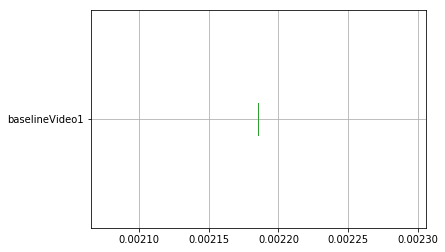

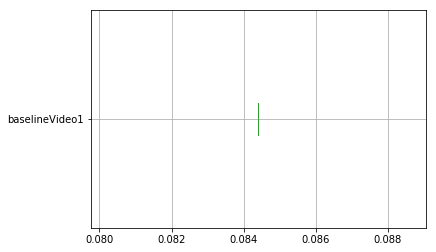

In [137]:
from pandas import read_csv
from matplotlib import pyplot
 
# load all .csv results into a dataframe
train, test = DataFrame(), DataFrame()
#directory = 'results'
directory =  folderName+'/Result'
for name in listdir(directory):
	if not name.endswith('csv'):
		continue
	filename = directory + '/' + name
	data = read_csv(filename, header=0)
	experiment = name.split('.')[0]
	train[experiment] = data['train']
	test[experiment] = data['test']
 
# plot results on train
train.boxplot(vert=False)
pyplot.show()
# plot results on test
test.boxplot(vert=False)
pyplot.show()